#**PRAKTIKUM 9 MACHINE LEARNING (NAIVE BAYES)**

Nama : Imelda Wahyuni

Nim : 0110222042

Sesi : Pagi

#**1. Import Library**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

- import pandas as pd: Digunakan untuk membaca dan memanipulasi data dalam bentuk
DataFrame.
- import numpy as np: Digunakan untuk operasi numerik, terutama pada array.
- import matplotlib.pyplot as plt: Digunakan untuk membuat visualisasi statis.
- import seaborn as sns: Digunakan untuk membuat visualisasi data statistik yang lebih informatif.
- from sklearn.model_selection import train_test_split,Fungsi untuk membagi dataset menjadi data training dan testing.
- from sklearn.metrics import accuracy_score, confusion_matrix, classification_report: Metrik yang
digunakan untuk mengevaluasi performa model.
- from sklearn.preprocessing import StandardScaler: Digunakan untuk menstandarisasi fitur
numerik.
- from sklearn.naive_bayes import GaussianNB: Model klasifikasi Naive Bayes yang digunakan.

#**2. Loading Dataset**

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
# Membaca file csv menggunakan pandas
titanic_data = pd.read_csv("/content/gdrive/MyDrive/SEMESTER 7/Machine Learning/praktikum09/data/Titanic dataset.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [19]:
titanic_data.shape

(418, 12)

Membaca dataset dengan pd.read_csv lalu, menampilkan 5 baris pertama dengan .head(),  .tail() untuk
menampilkan 5 baris terakhir dan .shape untuk menunjukkan dataset memiliki 418 baris (entri) dan 12
kolom.

In [20]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Melihat informasi dataset terdiri dari 3 type dataset : float64(2), int64(5) dan object(5).

#**3. Missing Value**

Mengecek missing value, terdapat nilai missing value pada 3 kolom yaitu kolom Age, Fare dan Cabin.

In [21]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


Menghapus kolom yang tidak relevan untuk pemodelan: PassengerId, Cabin (banyak missing
values), Name, dan Ticket.

In [22]:
titanic_data = titanic_data.drop(columns=['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)

Mengecek Outliers: Digunakan untuk memvisualisasikan sebaran data Age dan Fare untuk melihat
adanya Outliers sebelum imputasi.

<function matplotlib.pyplot.show(close=None, block=None)>

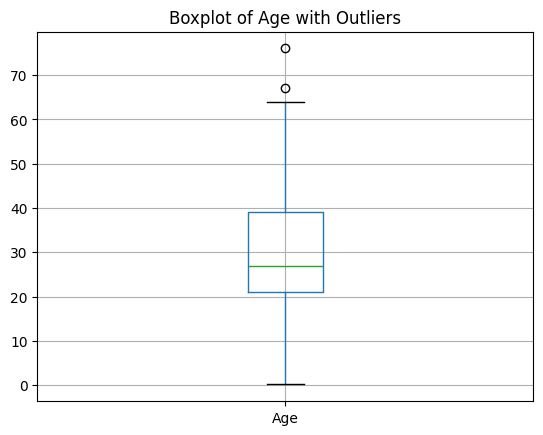

In [23]:
titanic_data.boxplot(column=['Age'])
plt.title("Boxplot of Age with Outliers")
plt.show

Menangani missing value dengan mengisi
- Mengisi missing values pada kolom Age (usia) dengan nilai median dari kolom tersebut.
Median lebih tahan terhadap outliers dibandingkan mean.
- Mengisi missing values pada kolom Fare (tarif) dengan nilai median dari kolom tersebut.

In [24]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

/tmp/ipython-input-423417795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
/tmp/ipython-input-423417795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

Mengecek ulang missing value, semua kolom sudah bersih dan tidak ada nilai kotor.

In [25]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


#**4. Data Analysis & Encoding Kategorikal**

Memberikan ringkasan statistik (rata-rata, standar deviasi, min/max,
kuartil) untuk kolom numerik.

In [26]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [27]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,266
1,152


In [28]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,266
female,152


In [29]:
titanic_data['Pclass'].value_counts()

,count
Pclass,
3,218
1,107
2,93


 - Survived: Terdapat 266 penumpang yang Not Survived (0) dan 152 yang Survived (1).
- Sex: Terdapat 266 male dan 152 female.   
- Pclass: Kelas 3 (218) adalah yang terbanyak, diikuti Kelas 1 (107) dan Kelas 2 (93).

Visualisasi Data (sns.countplot): Menunjukkan korelasi visual antara fitur (Sex, Pclass, Embarked) dengan target Survived. Terlihat jelas bahwa perempuan (Sex=female) dan penumpang Kelas 1
(Pclass=1) memiliki tingkat kelangsungan hidup yang lebih tinggi.

<function matplotlib.pyplot.show(close=None, block=None)>

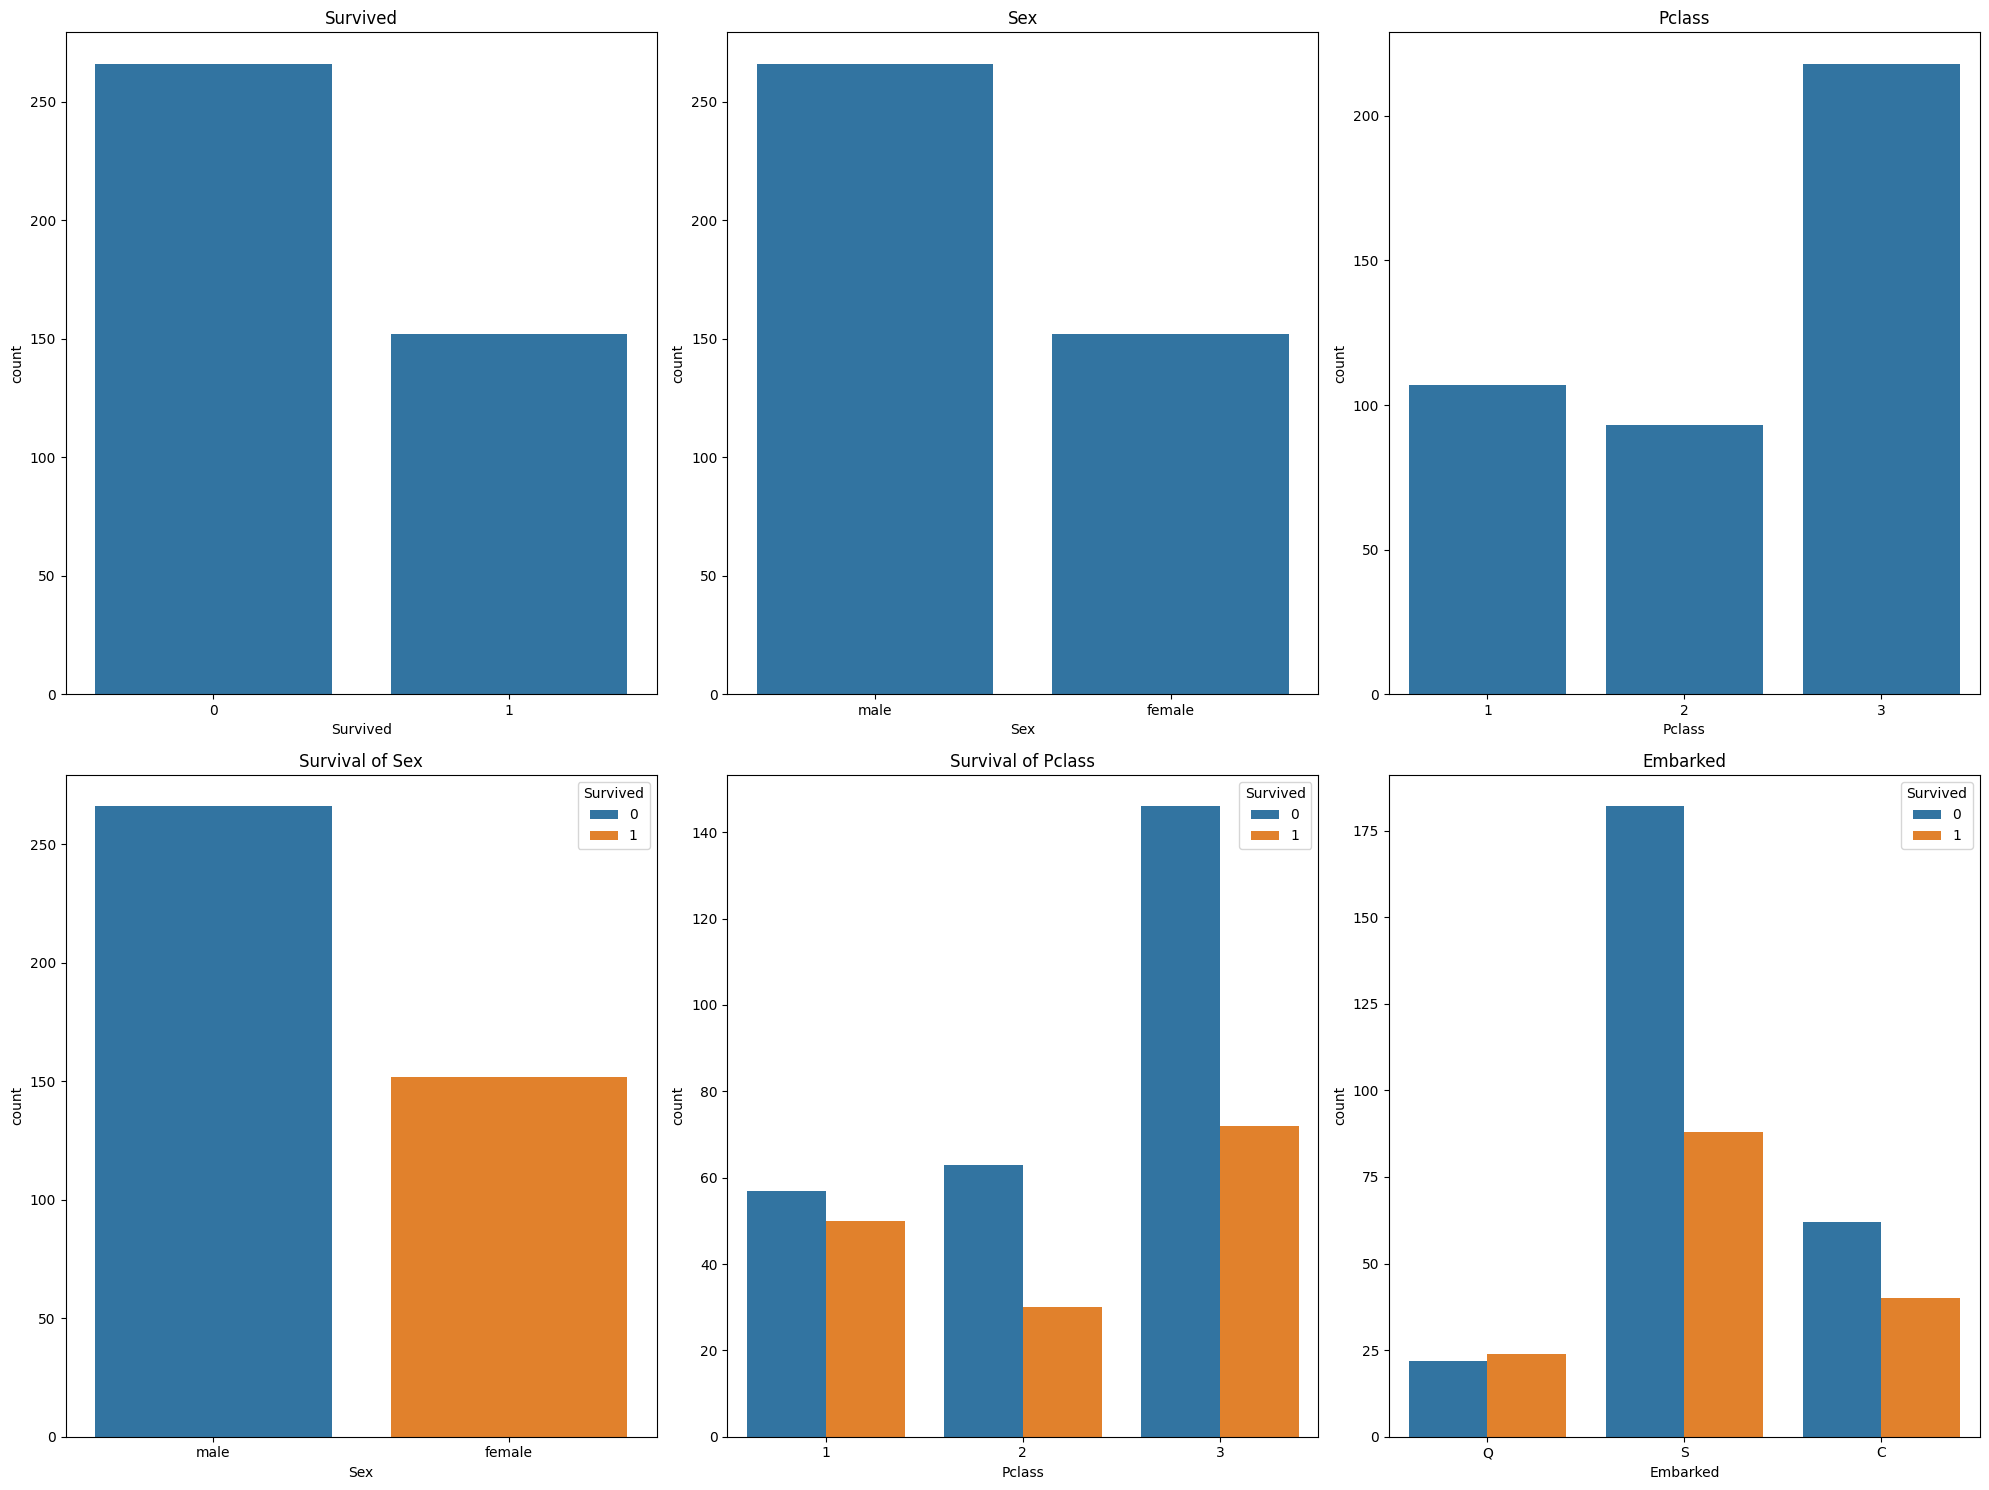

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

axes = axes.flatten()

sns.countplot(x= 'Survived', data=titanic_data, ax=axes[0])
axes[0].set_title('Survived')

sns.countplot(x= 'Sex', data=titanic_data, ax=axes[1])
axes[1].set_title('Sex')

sns.countplot(x= 'Pclass', data=titanic_data, ax=axes[2])
axes[2].set_title('Pclass')

sns.countplot(x= 'Sex', hue='Survived', data=titanic_data, ax=axes[3])
axes[3].set_title('Survival of Sex')

sns.countplot(x= 'Pclass', hue='Survived', data=titanic_data, ax=axes[4])
axes[4].set_title('Survival of Pclass')

sns.countplot(x= 'Embarked', hue='Survived', data=titanic_data, ax=axes[5])
axes[5].set_title('Embarked')

plt.tight_layout()
plt.show

Encoding Kategorikal: Fitur Sex dan Embarked diubah menjadi nilai numerik agar dapat diproses
oleh model:
- Sex: male ->  0, female -> 1
- Embarked (Pelabuhan Keberangkatan): S -> 0, C -> 1, Q -> 2

In [31]:
replacements={
    'Sex':{'male':0,'female':1},
    'Embarked':{'S':0,'C':1,'Q':2}
}

titanic_data.replace(replacements, inplace=True)

/tmp/ipython-input-3596095537.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace(replacements, inplace=True)


In [32]:
titanic_data.iloc[0:9]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0
5,0,3,0,14.0,0,0,9.2250,0
6,1,3,1,30.0,0,0,7.6292,2
7,0,2,0,26.0,1,1,29.0000,0
8,1,3,1,18.0,0,0,7.2292,1


In [33]:
titanic_data.iloc[0:9]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0
5,0,3,0,14.0,0,0,9.2250,0
6,1,3,1,30.0,0,0,7.6292,2
7,0,2,0,26.0,1,1,29.0000,0
8,1,3,1,18.0,0,0,7.2292,1


#**5. Separating, Splitting, and Scaling Data**

In [34]:
X = titanic_data.drop(columns=['Survived'])
Y = titanic_data['Survived']

In [35]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [36]:
Y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


- X = titanic_data.drop(columns=['Survived'])Fitur (X) adalah semua kolom kecuali target Survived.
- Y = titanic_data['Survived']Target (Y) adalah kolom yang ingin diprediksi.

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y,random_state=42)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

• train_test_split(...)Membagi data menjadi 80% untuk training (334 data) dan 20% untuk testing
(84 data). Argumen stratify=Y memastikan proporsi kelas Survived seimbang di kedua set.
scaler = StandardScaler()Objek StandardScaler dibuat untuk menstandarisasi fitur (membuat
mean = 0 dan standard deviation = 1).

• scaler.fit_transform(X_train)Melatih scaler pada data training dan menerapkannya. Ini sangat
penting untuk Naive Bayes, terutama GaussianNB, karena sensitif terhadap skala fitur.

• scaler.transform(X_test)Menerapkan scaler yang sudah dilatih ke data testing.


#**6. Naive Bayes Classification**

In [40]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

Model Gaussian Naive Bayes dibangun dan dilatih menggunakan data yang sudah distandarisasi.
- from sklearn.naive_bayes import GaussianNB akan mengimpor model GaussianNB, yang
mengasumsikan fitur berdistribusi normal.
- nb_model = GaussianNB() untuk membuat instance model.
- nb_model.fit(X_train_scaled, Y_train) untuk melatih model menggunakan fitur training yang
sudah distandarisasi (X_train_scaled) dan label training (Y_train).

#**7. Accuracy Score & Evaluasi**

In [41]:
#Accuracy
train_pred_nb = nb_model.predict(X_train_scaled)
test_pred_nb = nb_model.predict(X_test_scaled)

In [42]:
print ("Training Accuracy (NB): ", accuracy_score(Y_train, train_pred_nb))
print ("Testing Accuracy (NB): ", accuracy_score(Y_test, test_pred_nb))

Training Accuracy (NB):  1.0
Testing Accuracy (NB):  1.0


Akurasi:
- Training Accuracy = 1.00 artinya akurasi model pada data latih (100%).
- Testing Accuracy = 1.00 artinya akurasi model pada data uji (100%). Nilai 1.00
menunjukkan model mampu memprediksi semua data uji dengan tepat.

Visualisasi Confusion Matrix: Confusion Matrix memvisualisasikan hasil prediksi dibandingkan
dengan nilai sebenarnya. Menghitung Confusion Matrix berdasarkan hasil prediksi pada data uji.

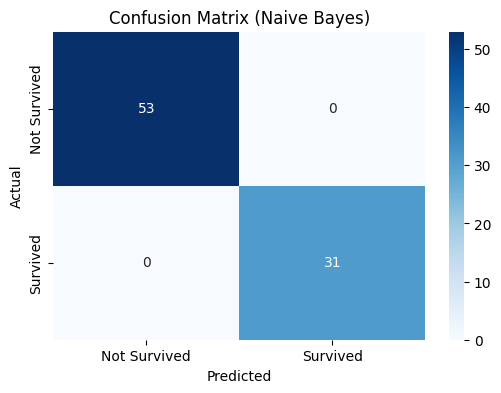

In [43]:
# Visualisasi Confusion Matrix (Naive Bayes)
plt.figure(figsize=(6,4))
cm_nb = confusion_matrix(Y_test, test_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Diagonal utama (kiri atas ke kanan bawah) menunjukkan jumlah prediksi yang benar. Karena
semua nilai berada pada diagonal utama (53 Not Survived dan 31 Survived diprediksi benar), ini
menegaskan akurasi 100% dan tidak adanya kesalahan klasifikasi (False Positive atau False
Negative).

Menampilkan metrik seperti Precision, Recall, dan F1-Score untuk setiap kelas.
Hasil: Semua metrik bernilai 1.00, menegaskan performa yang sempurna pada data uji.

In [44]:
print("\nClaasification Report (NB):")
print(classification_report(Y_test, test_pred_nb))


Claasification Report (NB):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



#**8. Cross Validation**

In [45]:
from sklearn.model_selection import cross_val_score
cv_nb = cross_val_score(nb_model, X, Y, cv=5, scoring='accuracy')
print("\nNaive Bayes Cross Validation Accuracy (5-Fold):")
print("Scores:", cv_nb)
print("Mean Accuracy:", cv_nb.mean())
print("Std Deviation:", cv_nb.std())


Naive Bayes Cross Validation Accuracy (5-Fold):
Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Std Deviation: 0.0


Hasil Cross-Validation: Mean Accuracy: 1.0 dan Std Deviation: 0.0. Hasil ini menunjukkan bahwa
model Naive Bayes sangat konsisten (standar deviasi 0.0) dan mempertahankan akurasi 100% di
semua fold validasi.